<h1>Playing with Unsupervised Learning algorithms</h1>
## Dataset: crimes in the US dataset
## Algorithm: K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
df = pd.read_csv("crimes.csv", sep=";", index_col=0)
df.head()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Etat,,,,,,,
Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [2]:
df.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


<AxesSubplot:>

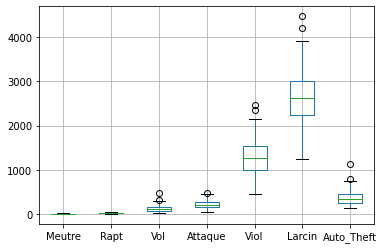

In [3]:
df.boxplot()

In [4]:
df[df["Viol"]>2300]

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Etat,,,,,,,
Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
Nevada,15.8,49.1,323.1,355.0,2453.1,4212.6,559.2


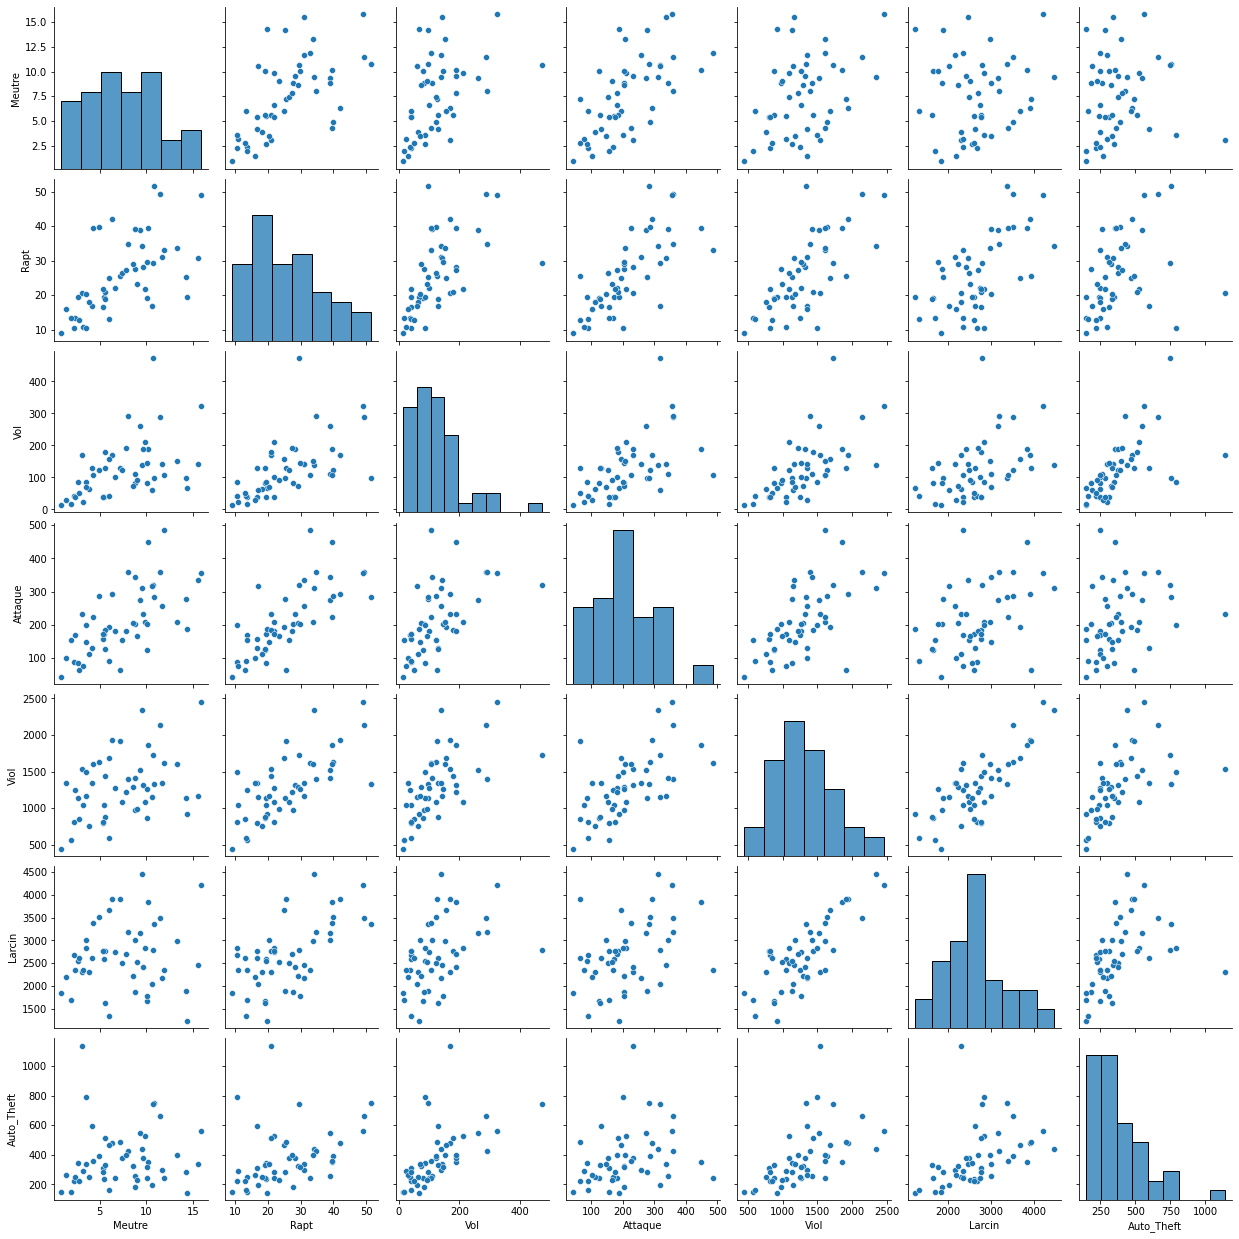

In [5]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [6]:
correlation = df.corr() # methode pearson par defaut
correlation

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


<AxesSubplot:>

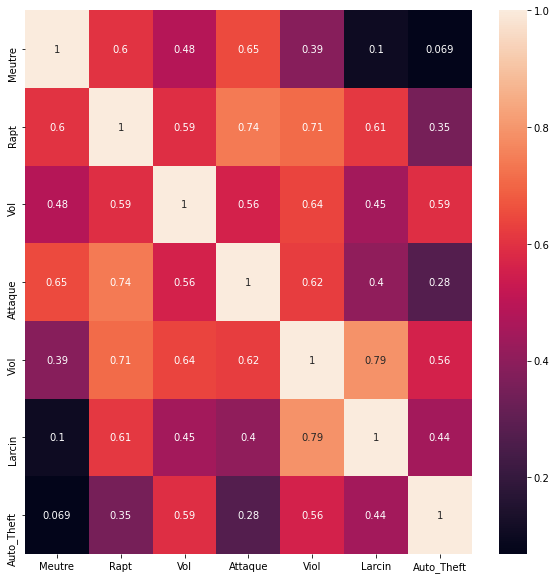

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation, annot=True)


In [8]:
from  sklearn.decomposition import PCA 

from sklearn.preprocessing import StandardScaler

In [9]:
pca=PCA(n_components=None)
sc= StandardScaler()
df_scaled = sc.fit_transform(X=df)
X_pca =pca.fit_transform(df_scaled)

                 PC0       PC1       PC2       PC3       PC4       PC5  \
Meutre      0.300279 -0.629174  0.178245 -0.232114  0.538123 -0.259117   
Rapt        0.431759 -0.169435 -0.244198  0.062216  0.188471  0.773271   
Vol         0.396875  0.042247  0.495861 -0.557989 -0.519977  0.114385   
Attaque     0.396652 -0.343528 -0.069510  0.629804 -0.506651 -0.172363   
Viol        0.440157  0.203341 -0.209895 -0.057555  0.101033 -0.535987   
Larcin      0.357360  0.402319 -0.539231 -0.234890  0.030099 -0.039406   
Auto_Theft  0.295177  0.502421  0.568384  0.419238  0.369753  0.057298   

                 PC6  
Meutre     -0.267593  
Rapt        0.296485  
Vol         0.003903  
Attaque    -0.191745  
Viol        0.648117  
Larcin     -0.601690  
Auto_Theft -0.147046  


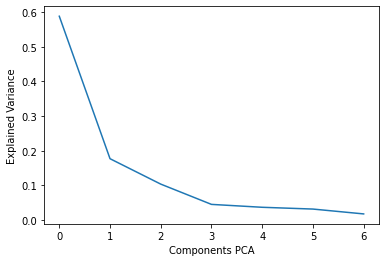

In [10]:
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df.columns))],
index=df.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components PCA')
plt.show()

In [11]:
sum(pca.explained_variance_ratio_[:2])

0.7648116201908643

In [12]:
X_pca.shape

(50, 7)

C:\Users\medsa\Anaconda3\envs\zindi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


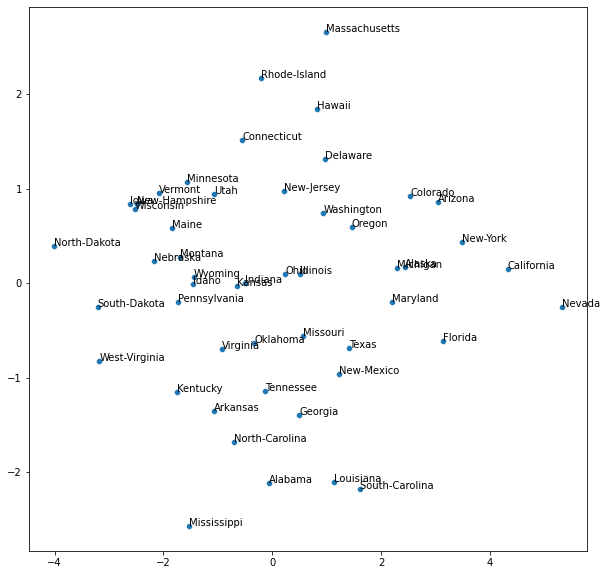

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot( X_pca[:,0], X_pca[:,1])
for label, x,y in zip(df.index, X_pca[:,0], X_pca[:,1] ):
    plt.annotate( label,  xy=(x,y))

## K-Means

### on Scaled Data

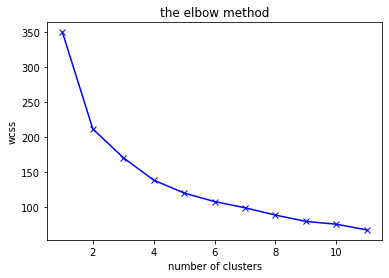

In [14]:
from sklearn.cluster import KMeans
wcss =[]
for k in range(1,12):
    km = KMeans(n_clusters=k, init="k-means++", random_state=0).fit(df_scaled)
    wcss.append(km.inertia_)
    
plt.plot(range(1,12),wcss,'bx-')
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

### on unscaled data

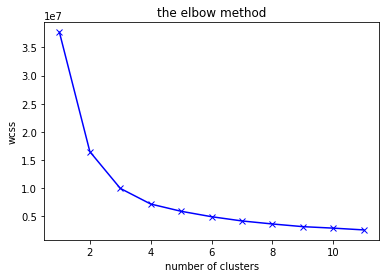

In [15]:
wcss1 =[]
for k in range(1,12):
    km2 = KMeans(n_clusters=k, init="k-means++", random_state=0).fit(df)
    wcss1.append(km2.inertia_)
    
plt.plot(range(1,12),wcss1,'bx-')
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [16]:
km2 = KMeans(n_clusters=4, init="k-means++", random_state=0).fit(df_scaled)

y_kmeans = km2.labels_
df_y_kmeans = pd.DataFrame({"y_kmeans":y_kmeans}, index = df.index)
df_kmeans = pd.concat([df,df_y_kmeans], axis=1)
df_kmeans.head()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft,y_kmeans
Etat,,,,,,,,
Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7,1
Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3,3
Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5,3
Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4,1
California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5,3


## Clusters Vizualisation

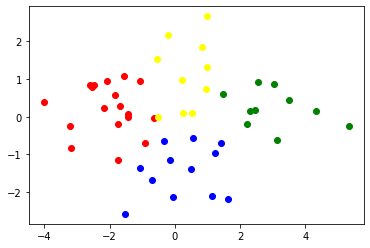

In [17]:
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans ==0,1],
               c='red',label='cluster 0')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans ==1,1],
               c='blue',label='cluster 1')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans ==2,1],
               c='yellow',label='cluster 2')
plt.scatter(X_pca[y_kmeans==3,0],X_pca[y_kmeans ==3,1],
               c='green',label='cluster 3')
                

In [18]:
df_kmeans.head()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft,y_kmeans
Etat,,,,,,,,
Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7,1
Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3,3
Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5,3
Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4,1
California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5,3


In [19]:
df_kmeans.to_csv('crimes_supervised.csv', index=False)